### Graph module of OSMNx


##### Graph from Address


In [3]:
import geemap 
import osmnx as ox
import geopandas as gpd

In [2]:
graph = ox.graph_from_address("Kandra, West Bengal", network_type="all")
graph

c:\Users\Hasem\miniconda3\envs\geogee\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


In [31]:
gdf = ox.graph_to_gdfs(graph, nodes=False)
gdf

osmid       highway  oneway reversed  \
u           v           key                                              
3326612686  10613420654 0    1137542953  unclassified   False     True   
            10613568377 0    1051646393  unclassified   False    False   
            10613513203 0    1137488968       primary   False    False   
            10613513180 0    1137488968       primary   False     True   
9664198482  9664201505  0    1051646377          path   False    False   
...                                 ...           ...     ...      ...   
10613761608 10613551874 0    1138571046  unclassified   False     True   
            10613548398 0    1138589725   residential   False     True   
10613761611 10613591838 0    1137488968       primary   False     True   
            10613761618 0    1138614843       service   False    False   
10613761618 10613761611 0    1138614843       service   False     True   

                              length  \
u           v           key            
3326612686  10613420654 0     66.654   
            10613568377 0     71.265   
            10613513203 0    151.965   
            10613513180 0     79.893   
9664198482  9664201505  0      5.063   
...                              ...   
10613761608 10613551874 0    121.494   
            10613548398 0    158.723   
10613761611 10613591838 0    172.811   
            10613761618 0     53.332   
10613761618 10613761611 0     53.332   

                                                                      geometry  \
u           v           key                                                      
3326612686  10613420654 0    LINESTRING (87.97192 23.73524, 87.97186 23.73464)   
            10613568377 0    LINESTRING (87.97192 23.73524, 87.97191 23.735...   
            10613513203 0    LINESTRING (87.97192 23.73524, 87.97169 23.735...   
            10613513180 0    LINESTRING (87.97192 23.73524, 87.97225 23.735...   
9664198482  9664201505  0    LINESTRING (87.96940 23.73924, 87.96939 23.73929)   
...                                                                        ...   
10613761608 10613551874 0    LINESTRING (87.96763 23.73112, 87.96753 23.731...   
            10613548398 0    LINESTRING (87.96763 23.73112, 87.96759 23.730...   
10613761611 10613591838 0    LINESTRING (87.96550 23.73875, 87.96572 23.738...   
            10613761618 0    LINESTRING (87.96550 23.73875, 87.96537 23.738...   
10613761618 10613761611 0    LINESTRING (87.96513 23.73845, 87.96519 23.738...   

                            lanes  ref bridge  
u           v           key                    
3326612686  10613420654 0     NaN  NaN    NaN  
            10613568377 0     NaN  NaN    NaN  
            10613513203 0       2  SH6    NaN  
            10613513180 0       2  SH6    NaN  
9664198482  9664201505  0     NaN  NaN    NaN  
...                           ...  ...    ...  
10613761608 10613551874 0     NaN  NaN    NaN  
            10613548398 0     NaN  NaN    NaN  
10613761611 10613591838 0       2  SH6    NaN  
            10613761618 0     NaN  NaN    NaN  
10613761618 10613761611 0     NaN  NaN    NaN  

[548 rows x 9 columns]

### Graph from Point


In [32]:
center_point = (23.44, 87.58)
type(center_point)

tuple

In [18]:
graph_point = ox.graph_from_point(center_point, 5000, network_type="all")

c:\Users\Hasem\miniconda3\envs\geogee\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


In [19]:
# grpah to gdf 
gdf = ox.graph_to_gdfs(graph_point, nodes=False)
gdf.head(2)

osmid   highway  oneway reversed  length  \
u         v          key                                                  
654103955 9589362265 0    1041616440  tertiary   False    False  44.978   
          9589387755 0    1041616440  tertiary   False     True  26.880   

                                                                   geometry  \
u         v          key                                                      
654103955 9589362265 0    LINESTRING (87.53569 23.46333, 87.53577 23.463...   
          9589387755 0    LINESTRING (87.53569 23.46333, 87.53567 23.463...   

                         bridge name lanes  ref tunnel  
u         v          key                                
654103955 9589362265 0      NaN  NaN   NaN  NaN    NaN  
          9589387755 0      NaN  NaN   NaN  NaN    NaN

<Axes: >

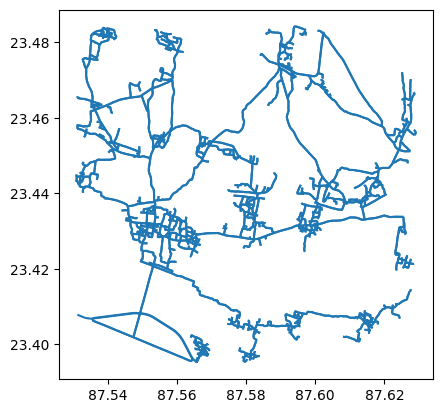

In [20]:
gdf.plot()

In [24]:
Map = geemap.Map()
Map.set_center(87.58, 23.44, 9)
Map.add_gdf(gdf, "Random point")
Map

Map(center=[23.44, 87.58], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

#### Graph from Bounding Box (bbox)


In [27]:
# Load road network data
roads = gdf